In [1]:
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers, backend as K, Model
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
import tqdm


2024-09-02 17:49:39.112098: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-02 17:49:39.463670: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-02 17:49:42.376045: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-02 17:49:46.042661: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-02 17:49:48.144580: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [2]:
with open('chess_X_train.pkl', 'rb') as f:
    X_train = pickle.load(f)

with open('chess_X_test.pkl', 'rb') as f:
    X_test = pickle.load(f)

with open('chess_y_train.pkl', 'rb') as f:
    y_train = pickle.load(f)

with open('chess_y_test.pkl', 'rb') as f:
    y_test = pickle.load(f)

In [3]:
unique_classes_train = np.unique(y_train)
unique_classes_test = np.unique(y_test)
y_combined_unique = np.concatenate((unique_classes_train, unique_classes_test))

num_classes = len(np.unique(y_combined_unique))
seq_len = 28

print(X_train.shape)
print(y_train.shape)

input_shape = (seq_len, 8, 8, X_train.shape[4])


(1713, 28, 8, 8, 12)
(1713,)


Evaluating Random Forest...


/mnt/c/Users/Maxwell Bruce/Desktop/AML/ChessOpenningMovePredictor/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/c/Users/Maxwell Bruce/Desktop/AML/ChessOpenningMovePredictor/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8487
F1 Score: 0.8404
Precision: 0.8503
Recall: 0.8487


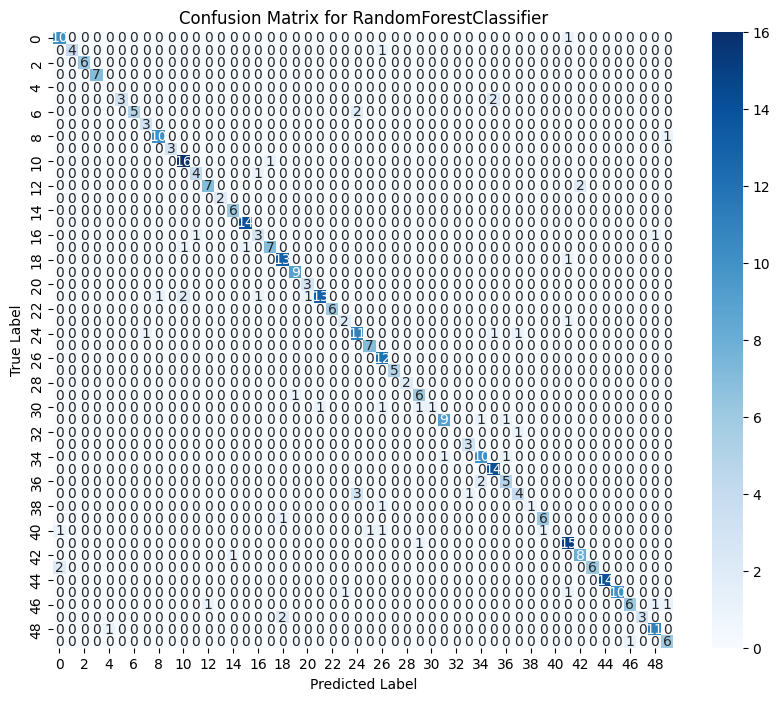

Evaluating K-Nearest Neighbors...


/mnt/c/Users/Maxwell Bruce/Desktop/AML/ChessOpenningMovePredictor/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/c/Users/Maxwell Bruce/Desktop/AML/ChessOpenningMovePredictor/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.5821
F1 Score: 0.5652
Precision: 0.6440
Recall: 0.5821


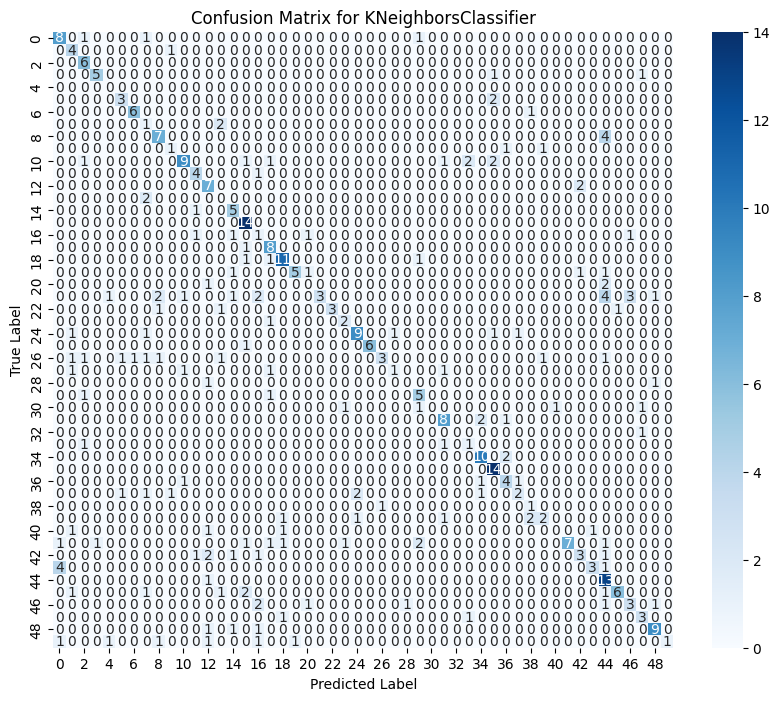

In [4]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")

    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for {model.__class__.__name__}')
    plt.show()

print("Evaluating Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
evaluate_model(rf_model, X_train_flat, y_train, X_test_flat, y_test)

print("Evaluating K-Nearest Neighbors...")
knn_model = KNeighborsClassifier(n_neighbors=5)
evaluate_model(knn_model, X_train_flat, y_train, X_test_flat, y_test)

# print("Evaluating Support Vector Machine...")
# svm_model = SVC(kernel='linear', random_state=42, decision_function_shape='ovr')
# evaluate_model(svm_model, X_train_flat, y_train, X_test_flat, y_test)


Evaluating Support Vector Machine...


Training SVC: 100%|██████████| 20/20 [3:56:22<00:00, 709.13s/it]   
/mnt/c/Users/Maxwell Bruce/Desktop/AML/ChessOpenningMovePredictor/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8385
F1 Score: 0.8314
Precision: 0.8488
Recall: 0.8385


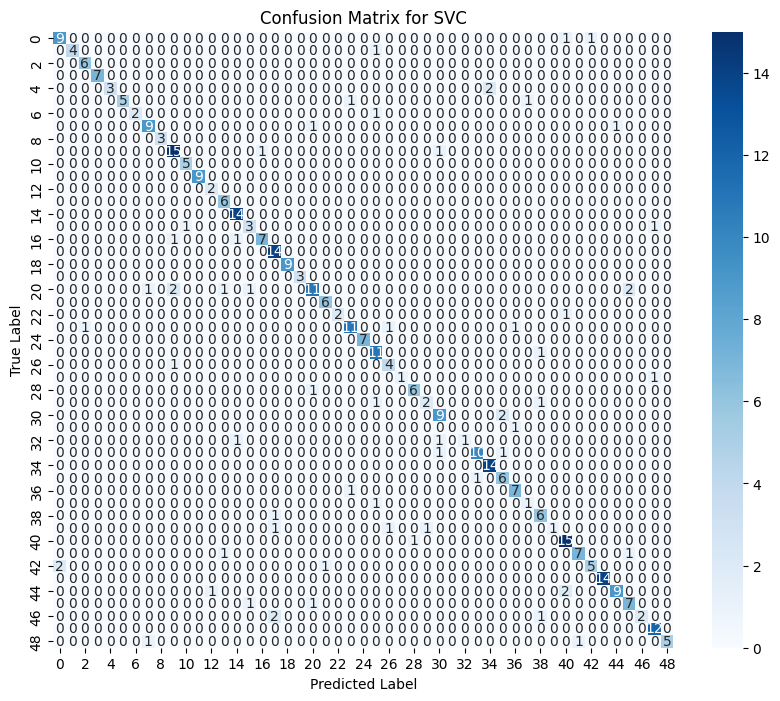

In [5]:
def evaluate_model_with_progress(model, X_train, y_train, X_test, y_test, n_splits=20):
    cv = StratifiedKFold(n_splits=n_splits)
    
    progress = tqdm.tqdm(total=cv.get_n_splits(X_train, y_train), desc=f"Training {model.__class__.__name__}")

    for train_idx, val_idx in cv.split(X_train, y_train):
        X_train_cv, X_val_cv = X_train[train_idx], X_train[val_idx]
        y_train_cv, y_val_cv = y_train[train_idx], y_train[val_idx]
        
        model.fit(X_train_cv, y_train_cv)
        progress.update(1)
    
    progress.close()

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")

    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for {model.__class__.__name__}')
    plt.show()

print("Evaluating Support Vector Machine...")
svm_model = SVC(kernel='linear', random_state=42, decision_function_shape='ovr')
evaluate_model_with_progress(svm_model, X_train_flat, y_train, X_test_flat, y_test)